<a href="https://colab.research.google.com/github/prachiss13/DLrepo/blob/main/DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris 
iris = load_iris()

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [24]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width','target']

Performing EDA

In [25]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target            int64
dtype: object

In [27]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [28]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Visualization

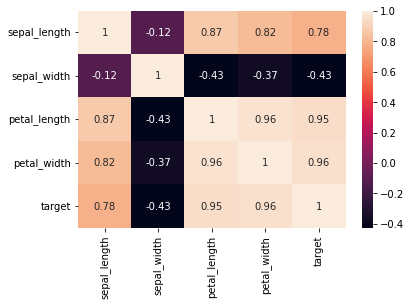

In [29]:
import seaborn as sns
sns.heatmap(df.corr(), annot = True);

Modelling

In [31]:
#dividing the data into predictors (X) and target values (y)
X = df.copy()
y = X.pop('target')

Performing Train_test_split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify = y)


Standardization

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Logistic regression model

In [34]:
from sklearn.linear_model import LogisticRegression
#create the model instance
model = LogisticRegression()
#fit the model on the training data
model.fit(X_train, y_train)
#the score, or accuracy of the model
model.score(X_test, y_test)

#the test score is already very high, but we can use the cross validated score to ensure the model's strength 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=10)
print(np.mean(scores))

0.9499999999999998


Coefficients

In [35]:
df_coef = pd.DataFrame(model.coef_, columns=X_train.columns)
df_coef

,sepal_length,sepal_width,petal_length,petal_width
0,-1.102746,1.001818,-1.836891,-1.667978
1,0.402982,-0.323432,-0.277761,-0.650011
2,0.699764,-0.678386,2.114653,2.317989


Predicted values

In [36]:
predictions = model.predict(X_test)
#compare predicted values with the actual scores
compare_df = pd.DataFrame({'actual': y_test, 'predicted': predictions})
compare_df = compare_df.reset_index(drop = True)
compare_df

,actual,predicted
0,2,2
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,2,2
7,2,2
8,2,2
9,1,1


Confusion matrix

In [37]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, predictions, labels=[2, 1, 0]),index=[2, 1, 0], columns=[2, 1, 0])

,2,1,0
2,9,1,0
1,0,10,0
0,0,0,10
